In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
from matplotlib.ticker import StrMethodFormatter

c:\program files (x86)\python36-32\lib\site-packages\matplotlib\__init__.py:535: UserWarning: matplotlibrc text.usetex can not be used unless ghostscript-7.07 or later is installed on your system
  'installed on your system') % gs_req)


In [4]:
fg = np.r_[50:1000:10000j] * u.MHz
Qc = 1e5
def transmission(fr, Qr):
    dx = ((fg - fr)/fr).to(1)
    S21 = (1 - (Qr/Qc)/(1 + 1j * 2 * Qr * dx)).to(1).value
    return S21

In [8]:
fr = np.array([250, 300, 350, 400, 450, 500]) * u.MHz
N = len(fr)
Qr = Qc * 0.5

S21s = np.vstack(list(map(transmission, fr, [Qr]*N)))

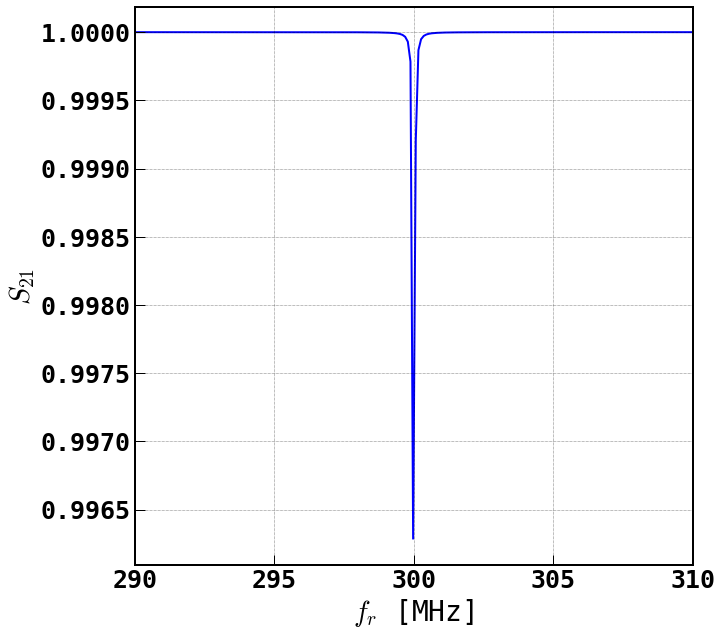

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(fg, np.abs(S21s[1]),'b')
ax.grid(axis='both')
ax.set_xlabel(r'$f_r$ [MHz]')
ax.set_ylabel(r'$S_{21}$')
ax.set_xlim([290, 310]);

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


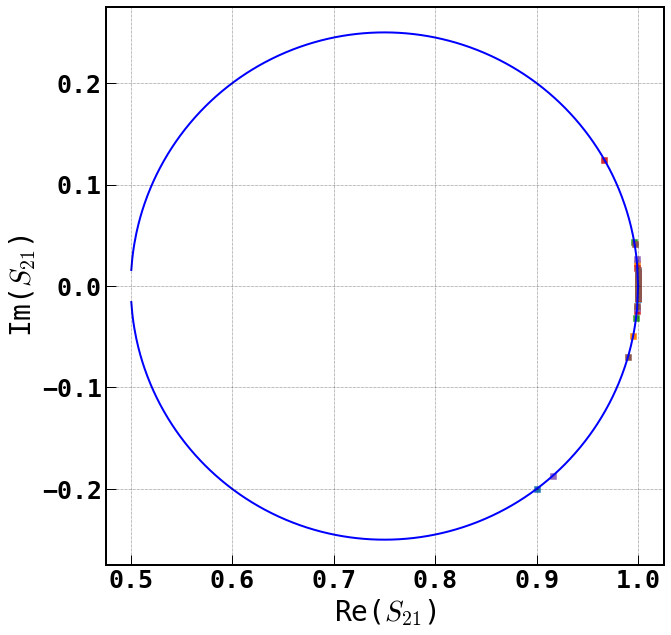

In [10]:
x = np.r_[0:1:1000j]
r = 0.5 * (Qr/Qc)
x0 = (1 - Qr/Qc) + r
yp = np.sqrt(r**2 - (x-x0)**2);
ym = -np.sqrt(r**2 - (x-x0)**2);
fig,ax = plt.subplots(figsize=(10,10))
for i in range(N):
    ax.plot(np.real(S21s[i]), np.imag(S21s[i]), 's')
ax.plot(x, yp, 'b')
ax.plot(x, ym, 'b')
ax.set_xlabel(r'Re($S_{21}$)')
ax.set_ylabel(r'Im($S_{21}$)')
ax.grid(which='both')
ax.axis('square');

In [11]:
mask = np.abs(1 -np.real(S21)) > 1e-7

NameError: name 'S21' is not defined

In [71]:
dx

<Quantity [-0.83333333,-0.83301663,-0.83269994,...,  2.33269994,
            2.33301663, 2.33333333]>

In [70]:
(1 + 1j)**2

2j

In [15]:
S21s.shape

(6, 10000)

In [15]:
np.any(fg == fr[3])

False